In [1]:
# Correlation Analysis

In [1]:
%matplotlib inline
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
ticker_1 = "SRU-UN.TO"
ticker_2 = "^GSPTSE"

In [28]:
price_data_1 = yf.download(ticker_1)
price_data_2 = yf.download(ticker_2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
price_data_2 = price_data_2.rename(columns = {"Open": "Open", "High": "High", "Low": "Low", "Close": "Close", "Adj Close":"Adj Close 2", "Volume": "Volume"})

In [30]:
combined_data = pd.merge(price_data_1["Adj Close"], price_data_2["Adj Close 2"], left_index = True, right_index = True)

In [31]:
# Take log returns of daily price change
adj_data_1 = np.log(combined_data.iloc[1:]["Adj Close"].values/combined_data.iloc[:-1]["Adj Close"].values)
adj_data_2 = np.log(combined_data.iloc[1:]["Adj Close 2"].values/combined_data.iloc[:-1]["Adj Close 2"].values)

In [32]:
combined_data.loc[combined_data.index[1]:, "Adj Close"] = adj_data_1
combined_data.loc[combined_data.index[1]:, "Adj Close 2"] = adj_data_2
combined_data = combined_data.dropna().loc[combined_data.index[1]:,:]

In [33]:
combined_data.corr()

,Adj Close,Adj Close 2
Adj Close,1.000000,0.475497
Adj Close 2,0.475497,1.000000


In [34]:
import datetime

In [35]:
# Calculate trailing 12-month correlation between two securities
times = combined_data.index
year = datetime.timedelta(days = 365)
corrs = []
for i in combined_data[times[0] + year:].index:
    corrs.append([i,combined_data[i - year:i].corr().iloc[0][1]])


In [36]:
corrs = np.array(corrs)
corrs

array([[Timestamp('2004-10-12 00:00:00'), 0.2610156341879476],
       [Timestamp('2004-10-13 00:00:00'), 0.2600128767294219],
       [Timestamp('2004-10-14 00:00:00'), 0.2627154119841038],
       ...,
       [Timestamp('2022-04-27 00:00:00'), 0.6180958560875296],
       [Timestamp('2022-04-28 00:00:00'), 0.6243700964070974],
       [Timestamp('2022-04-29 00:00:00'), 0.6234165390184171]],
      dtype=object)

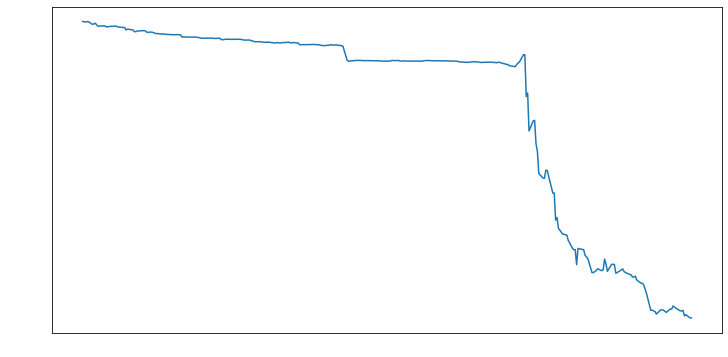

In [37]:
# Plot correlation coefficient over last 2 years
fig = plt.figure(figsize = (12,6))
ax = plt.axes()

ax.set_ylabel("Correlation Coefficient")
ax.yaxis.label.set_color("white")
ax.yaxis.label.set_size(18)

ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")

ax.plot(corrs[-500:-200,0], corrs[-500:-200,1])

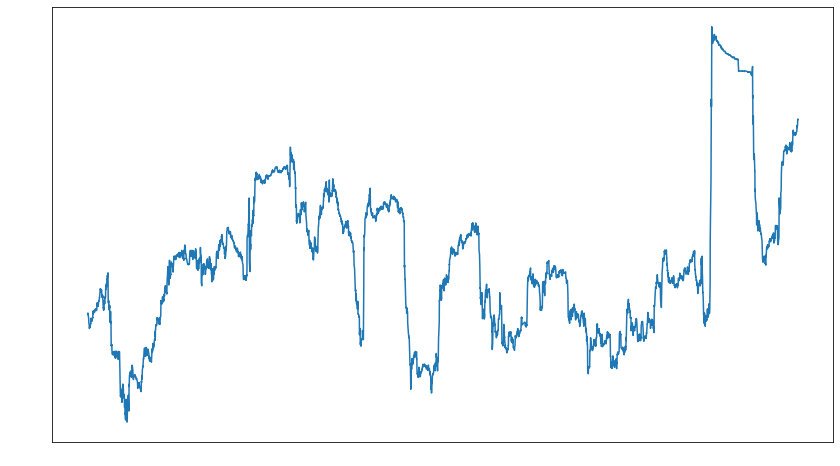

In [38]:
# Plot entire history of correlation coefficient

fig = plt.figure(figsize = (14,8))
ax = plt.axes()

ax.set_ylabel("Correlation Coefficient")
ax.yaxis.label.set_color("white")
ax.yaxis.label.set_size(18)

ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")

ax.plot(corrs[:,0], corrs[:,1])

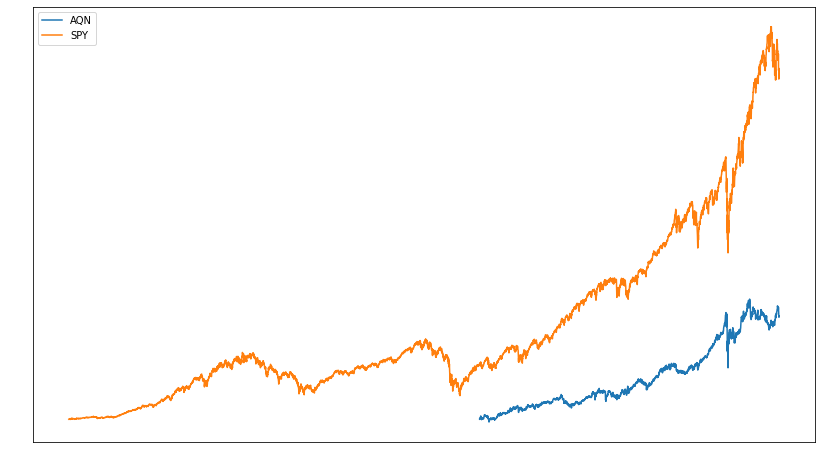

In [14]:
# Plot price chart of two securities

fig = plt.figure(figsize = (14,8))
ax = plt.axes()

ax.tick_params(axis = 'x', colors = "white")
ax.tick_params(axis = 'y', colors = "white")

ax.plot(price_data_1["Adj Close"]/(price_data_1.iloc[0]["Adj Close"]/price_data_2.iloc[0]["Adj Close 2"]), label = ticker_1)
ax.plot(price_data_2["Adj Close 2"], label = ticker_2)

leg = ax.legend();

In [14]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'yfinance',
 'pandas',
 'numpy',
 'matplotlib.pyplot',
 'datetime',
 'types']

In [17]:
import matplotlib
print(matplotlib.__version__)

3.3.4
